# Vector Representations of Documents

http://cs.stanford.edu/~quocle/paragraph_vector.pdf

http://research.google.com/pubs/pub44894.html

http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip

Based on:

https://www.tensorflow.org/tutorials/word2vec

In [1]:
import tensorflow as tf

In [2]:
import os
import re
import zipfile
import shutil

HOME_DIR = 'rotten_tomatoes'
DATA_DIR = os.path.join(HOME_DIR, 'data')

print('Unpacking Stanford Sentiment Treebank dataset...')

PKG_FILE = 'stanfordSentimentTreebank.zip'
PKG_PATH = os.path.join(DATA_DIR, PKG_FILE)

from tensorflow.contrib.learn.python.learn.datasets.base import maybe_download
maybe_download(PKG_FILE, DATA_DIR, 'http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip')

DATAFILE_PATTERN = re.compile(r'^stanfordSentimentTreebank/.+\.txt$')

def extract(zip_file, filename, dst_path):
    print('Extracting', filename)
    dst_file = os.path.join(dst_path, os.path.basename(filename))
    with open(dst_file, 'wb') as fout:
        fin = zip_file.open(filename)
        shutil.copyfileobj(fin, fout)

with zipfile.ZipFile(PKG_PATH) as f:
    files = [name for name in f.namelist() if DATAFILE_PATTERN.match(name)]
    for filename in files:
        extract(f, filename, DATA_DIR)

Unpacking Stanford Sentiment Treebank dataset...
Extracting stanfordSentimentTreebank/datasetSentences.txt
Extracting stanfordSentimentTreebank/datasetSplit.txt
Extracting stanfordSentimentTreebank/dictionary.txt
Extracting stanfordSentimentTreebank/original_rt_snippets.txt
Extracting stanfordSentimentTreebank/README.txt
Extracting stanfordSentimentTreebank/sentiment_labels.txt
Extracting stanfordSentimentTreebank/SOStr.txt
Extracting stanfordSentimentTreebank/STree.txt


In [3]:
def show(filename, n=10):
    with open(filename) as f:
        for _ in range(n):
            print(next(f).strip())

In [4]:
SENTENCES_FILE = os.path.join(DATA_DIR, 'datasetSentences.txt')
show(SENTENCES_FILE)

sentence_index	sentence
1	The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
2	The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
3	Effective but too-tepid biopic
4	If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .
5	Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel like one .
6	The film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .
7	Offers that rare combination of entertainment and education .
8	Perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .
9	Ste

In [5]:
PHRASES_FILE = os.path.join(DATA_DIR, 'dictionary.txt')
show(PHRASES_FILE)

!|0
! '|22935
! ''|18235
! Alas|179257
! Brilliant|22936
! Brilliant !|40532
! Brilliant ! '|22937
! C'mon|60624
! Gollum 's ` performance ' is incredible|13402
! Oh , look at that clever angle ! Wow , a jump cut !|179258


In [6]:
LABELS_FILE = os.path.join(DATA_DIR, 'sentiment_labels.txt')
show(LABELS_FILE)

phrase ids|sentiment values
0|0.5
1|0.5
2|0.44444
3|0.5
4|0.42708
5|0.375
6|0.41667
7|0.54167
8|0.33333


In [7]:
SPLIT_FILE = os.path.join(DATA_DIR, 'datasetSplit.txt')
show(SPLIT_FILE)

sentence_index,splitset_label
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [8]:
sentences = dict()

def text_fix(txt):
    if '-LRB-' in txt:
        txt = txt.replace('-LRB-', '(')
    if '-RRB-' in txt:
        txt = txt.replace('-RRB-', ')')
    if 'Ã¡' in txt:
        txt = txt.replace('Ã¡', 'á')
    if 'Ã ' in txt:
        txt = txt.replace('Ã ', 'à')
    if 'Ã¢' in txt:
        txt = txt.replace('Ã¢', 'â')
    if 'Ã£' in txt:
        txt = txt.replace('Ã£', 'ã')
    if 'Ã©' in txt:
        txt = txt.replace('Ã©', 'é')
    if 'Ã¨' in txt:
        txt = txt.replace('Ã¨', 'è')
    if 'Ã­' in txt:
        txt = txt.replace('Ã­', 'í')
    if 'Ã¯' in txt:
        txt = txt.replace('Ã¯', 'ï')
    if 'Ã³' in txt:
        txt = txt.replace('Ã³', 'ó')
    if 'Ã´' in txt:
        txt = txt.replace('Ã´', 'ô')
    if 'Ã¶' in txt:
        txt = txt.replace('Ã¶', 'ö')
    if 'Ã»' in txt:
        txt = txt.replace('Ã»', 'û')
    if 'Ã¼' in txt:
        txt = txt.replace('Ã¼', 'ü')
    if 'Ã¦' in txt:
        txt = txt.replace('Ã¦', 'æ')
    if 'Ã§' in txt:
        txt = txt.replace('Ã§', 'ç')
    if 'Ã±' in txt:
        txt = txt.replace('Ã±', 'ñ')
    if '2Â' in txt:
        txt = txt.replace('2Â', '2')
    if '8Â' in txt:
        txt = txt.replace('8Â', '8')
    return txt

with open(SENTENCES_FILE) as f:
    f.readline() # skip header
    while True:
        line = f.readline()
        if not line:
            break
        idx, txt = line.rstrip().split('\t')
        sentences[idx] = text_fix(txt)

print("Sentences:", len(sentences))

Sentences: 11855


In [9]:
phrases = dict()

with open(PHRASES_FILE) as f:
    while True:
        line = f.readline()
        if not line:
            break
        txt, idx = line.rstrip().split('|')
        phrases[txt] = idx

print("Phrases:", len(phrases))

Phrases: 239232


In [10]:
labels = dict()

with open(LABELS_FILE) as f:
    f.readline() # skip header
    while True:
        line = f.readline()
        if not line:
            break
        idx, score = line.rstrip().split('|')
        labels[idx] = float(score)

print("Labels:", len(labels))

Labels: 239232


In [12]:
n = 0
for txt in sentences.values():
    if txt not in phrases:
        print('Missing:', txt)
        n += 1

print('\nTotal missing:', n)


Total missing: 0


In [12]:
# %%time

# sentence_phrases = {s: list() for s in sentences.keys()}
# phrases_count = {phrase: 0 for phrase in phrases.keys()}

# for phrase, p in phrases.iteritems():
#     n = 0
#     for s, txt in sentences.iteritems():
#         if phrase in txt:
#             sentence_phrases[s].append(p)
#             n += 1
#     phrases_count[phrase] = n

In [13]:
# top_phrases = sorted(phrases_count.items(), key=lambda i: i[1], reverse=True)
# top_phrases[0:30]

In [14]:
# top_sentences = sorted(sentence_phrases.items(), key=lambda i: len(i[1]), reverse=True)
# [(s, len(p)) for s, p in top_sentences[0:30]]

In [13]:
train = list()
valid = list()
test = list()

splits = {
    '1': train,
    '2': test,
    '3': valid,
}

with open(SPLIT_FILE) as f:
    f.readline() # skip header
    while True:
        line = f.readline()
        if not line:
            break
        idx, split = line.rstrip().split(',')
        splits[split].append(idx)

print('Train sentences:', len(train))
print('Test sentences:', len(test))
print('Validation sentences:', len(valid))

Train sentences: 8544
Test sentences: 2210
Validation sentences: 1101


## Word2vec

In [14]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9(),!?\'\`]', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip().lower()

def words(sentences_list):
    return ' '.join(clean_text(sentences[s]) for s in sentences_list).split()

words(train[0:1])

['the',
 'rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'century',
 "'s",
 'new',
 '``',
 'conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'arnold',
 'schwarzenegger',
 ',',
 'jean',
 'claud',
 'van',
 'damme',
 'or',
 'steven',
 'segal']

In [15]:
import collections

VOCABULARY_SIZE = 50000

class Corpus(object):
    
    def __init__(self, words, vocabulary_size = VOCABULARY_SIZE):
        count = collections.Counter(words).most_common(vocabulary_size - 1)
        
        dictionary = dict(UNK=0)
        for word, _ in count:
            dictionary[word] = len(dictionary)
        
        data = list()
        unk_count = 0
        for word in words:
            if word in dictionary:
                index = dictionary[word]
            else:
                index = 0  # dictionary['UNK']
                unk_count += 1
            data.append(index)

        count.insert(0, ('UNK', unk_count))
        reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

        self.dictionary = dictionary
        self.reverse_dictionary = reverse_dictionary
        self.data = data
        self.count = count
    
    @property
    def vocabulary_size(self):
        return len(self.dictionary)
    
    def most_common(self, n=5):
        return self.count[:n]
    
    def sample_ids(self, start=0, n=10):
        return self.data[start:(start + n)]

    def sample_words(self, start=0, n=10):
        return [self.word_from_id(i) for i in self.sample_ids(start, n)]

    def word_to_id(self, word):
        return self.dictionary[word]
    
    def word_from_id(self, i):
        return self.reverse_dictionary[i]
    
train_data = Corpus(words(train))

print('Vocabulary size:')
print(train_data.vocabulary_size)
print('\nMost common words (+UNK):')
print(train_data.most_common())
print('\nSample data:')
print(train_data.sample_ids())
print(train_data.sample_words())

Vocabulary size:
15338

Most common words (+UNK):
[('UNK', 0), ('the', 7353), (',', 7131), ('a', 5313), ('and', 4521)]

Sample data:
[1, 536, 7, 3552, 6, 23, 1, 2936, 945, 8]
['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', "'s"]


In [16]:
import random
import numpy as np

class BatchGenerator(object):
    
    def __init__(self, data, batch_size, num_skips, skip_window):
        assert batch_size % num_skips == 0
        assert num_skips <= 2 * skip_window

        self.data = data
        self.data_index = 0
        
        self.batch_size = batch_size
        self.num_skips = num_skips
        self.skip_window = skip_window
        
        self.window_size = 2 * skip_window + 1 # [ skip_window target skip_window ]

        self.window = collections.deque(maxlen=self.window_size)
        for _ in range(self.window_size):
            self.window_forward()

    def window_forward(self):
        self.window.append(self.data[self.data_index])
        self.data_index = (self.data_index + 1) % len(self.data)


    def read(self):
        batch = np.ndarray(shape=(self.batch_size), dtype=np.int32)
        labels = np.ndarray(shape=(self.batch_size, 1), dtype=np.int32)

        for i in range(self.batch_size // self.num_skips):
            center = self.skip_window
            target = center
            targets_to_avoid = [ center ]
            for j in range(self.num_skips):
                while target in targets_to_avoid:
                    target = random.randint(0, self.window_size - 1)
                targets_to_avoid.append(target)
                batch[i * self.num_skips + j] = self.window[center]
                labels[i * self.num_skips + j, 0] = self.window[target]
            self.window_forward()

        return batch, labels

data_reader = BatchGenerator(train_data.data, batch_size=8, num_skips=2, skip_window=1)

print('1st Batch:\n')
batch, labels = data_reader.read()
for i in range(len(batch)):
    print(batch[i], train_data.word_from_id(batch[i]), '->', labels[i, 0], train_data.word_from_id(labels[i, 0]))

print('\n2nd Batch:\n')
batch, labels = data_reader.read()
for i in range(len(batch)):
    print(batch[i], train_data.word_from_id(batch[i]), '->', labels[i, 0], train_data.word_from_id(labels[i, 0]))

1st Batch:

536 rock -> 7 is
536 rock -> 1 the
7 is -> 536 rock
7 is -> 3552 destined
3552 destined -> 7 is
3552 destined -> 6 to
6 to -> 3552 destined
6 to -> 23 be

2nd Batch:

23 be -> 1 the
23 be -> 6 to
1 the -> 23 be
1 the -> 2936 21st
2936 21st -> 1 the
2936 21st -> 945 century
945 century -> 8 's
945 century -> 2936 21st


In [19]:
import math

class Word2vecModel(object):
    
    #vocabulary_size
    #embedding_size
    #num_sampled
    #valid_examples
    
    #input_data
    #input_labels
    #loss
    #optimizer
    #normalized_embeddings
    #similarity
    
    def __init__(self,
                 vocabulary_size,
                 embedding_size,
                 num_sampled,
                 valid_examples):
        self.vocabulary_size = vocabulary_size
        self.embedding_size = embedding_size
        self.num_sampled = num_sampled
        self.valid_examples = valid_examples
        
        self.build_graph()
    
    def build_graph(self):
        self.input_data = tf.placeholder(tf.int32, shape=[None])
        self.input_labels = tf.placeholder(tf.int32, shape=[None, 1])
        
        embeddings = tf.Variable(
            tf.random_uniform(
                [self.vocabulary_size, self.embedding_size],
                -1.0,
                1.0))
        embed = tf.nn.embedding_lookup(embeddings, self.input_data)

        nce_weights = tf.Variable(
            tf.truncated_normal(
                [self.vocabulary_size, self.embedding_size],
                stddev=1.0 / math.sqrt(self.embedding_size)))
        nce_biases = tf.Variable(tf.zeros([self.vocabulary_size]))
    
        self.loss = tf.reduce_mean(
            tf.nn.nce_loss(
                weights=nce_weights,
                biases=nce_biases,
                labels=self.input_labels,
                inputs=embed,
                num_sampled=self.num_sampled,
                num_classes=self.vocabulary_size))

        self.optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(self.loss)

        norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
        self.normalized_embeddings = embeddings / norm
        
        valid_dataset = tf.constant(self.valid_examples, dtype=tf.int32)
        valid_embeddings = tf.nn.embedding_lookup(self.normalized_embeddings, valid_dataset)
        self.similarity = tf.matmul(valid_embeddings, self.normalized_embeddings, transpose_b=True)

class Word2vecTrainer(object):
    
    #dataset
    #batch_size
    #num_skips
    #skip_window
    #embedding_size
    #num_sampled

    def __init__(self,
                 corpus,
                 batch_size,
                 num_skips,
                 skip_window,
                 embedding_size,
                 num_sampled):
        self.corpus = corpus
        self.batch_size = batch_size
        self.num_skips = num_skips
        self.skip_window = skip_window
        self.embedding_size = embedding_size
        self.num_sampled = num_sampled
    
    def word_from_id(self, i):
        return self.corpus.word_from_id(i)

    def train(self, num_steps=100001):
        data_reader = self.data_reader()
        valid_examples = self.valid_examples()
        top_k = 8 # number of nearest neighbors
        
        with tf.Graph().as_default(), tf.Session() as session:
            model = self.build_model(valid_examples)
            
            init = tf.initialize_all_variables()
            session.run(init)
            print('Initialized.\n')
            
            train_ops = [model.optimizer, model.loss]
            average_loss = 0
            
            for step in range(num_steps):
                batch_data, batch_labels = data_reader.read()
                feed_dict = {model.input_data: batch_data, model.input_labels: batch_labels}
                
                _, loss_val = session.run(train_ops, feed_dict=feed_dict)
                average_loss += loss_val
                
                if step % 2000 == 0:
                    if step > 0:
                        average_loss /= 2000
                    print('Average loss at step {}: {}'.format(step, average_loss))
                    average_loss = 0
                
                if step % 10000 == 0:
                    similarity = session.run(model.similarity)
                    print()
                    for i, example_id in enumerate(valid_examples):
                        valid_word = self.word_from_id(example_id)
                        nearest = (-similarity[i, :]).argsort()[1:top_k+1]
                        nearest_words = (self.word_from_id(k) for k in nearest)
                        print('Nearest to {}: {}'.format(valid_word, ', '.join(nearest_words)))
                    print()
            
            final_embeddings = session.run(model.normalized_embeddings)
        
        return final_embeddings
    
    def data_reader(self):
        return BatchGenerator(self.corpus.data, self.batch_size, self.num_skips, self.skip_window)

    def valid_examples(self, sample_size=16):
        return np.random.choice(self.corpus.vocabulary_size - 1, sample_size, replace=False)

    def build_model(self, valid_examples):
        return Word2vecModel(self.corpus.vocabulary_size, self.embedding_size, self.num_sampled, valid_examples)

In [20]:
%%time

trainer = Word2vecTrainer(
    train_data,
    batch_size = 128,
    skip_window = 1,       # How many words to consider left and right.
    num_skips = 2,         # How many times to reuse an input to generate a label.
    embedding_size = 128,  # Dimension of the embedding vector.
    num_sampled = 64)      # Number of negative examples to sample.

final_embeddings = trainer.train()

Initialized.

Average loss at step 0: 221.286422729

Nearest to steaming: lifelong, heavyweights, inept, cookie, dictator, muse, swift, grim
Nearest to avuncular: unmemorable, eisenhower, artistically, firing, mouthpieces, geddes, shred, horrid
Nearest to fingering: stealing, fate, write, hilary, fetching, warmed, testimonial, writers
Nearest to perspectives: janklowicz, miles, scorsese, indigenous, meditation, brooding, somehow, pair
Nearest to niro: g, parton, minimal, understands, documenting, jia, hollywood, cardboard
Nearest to orchard: daring, uncertainty, modesty, annoying, insatiable, bisset, psychology, kjell
Nearest to kraft: sleight, padre, peaks, disassociation, dreck, glamorous, soccer, seen
Nearest to bushels: enthusiasm, experienced, scotches, reappearing, exploratory, scooter, sure, sendak
Nearest to weakness: telescope, starting, hoped, gayton, wrote, cello, hailed, mercy
Nearest to strategic: making, foot, city, overwrought, boys, gesturing, vision, raw
Nearest to car

/home/cavani/Source/tensorflow-jupyter/deps/tensorflow-0.11/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


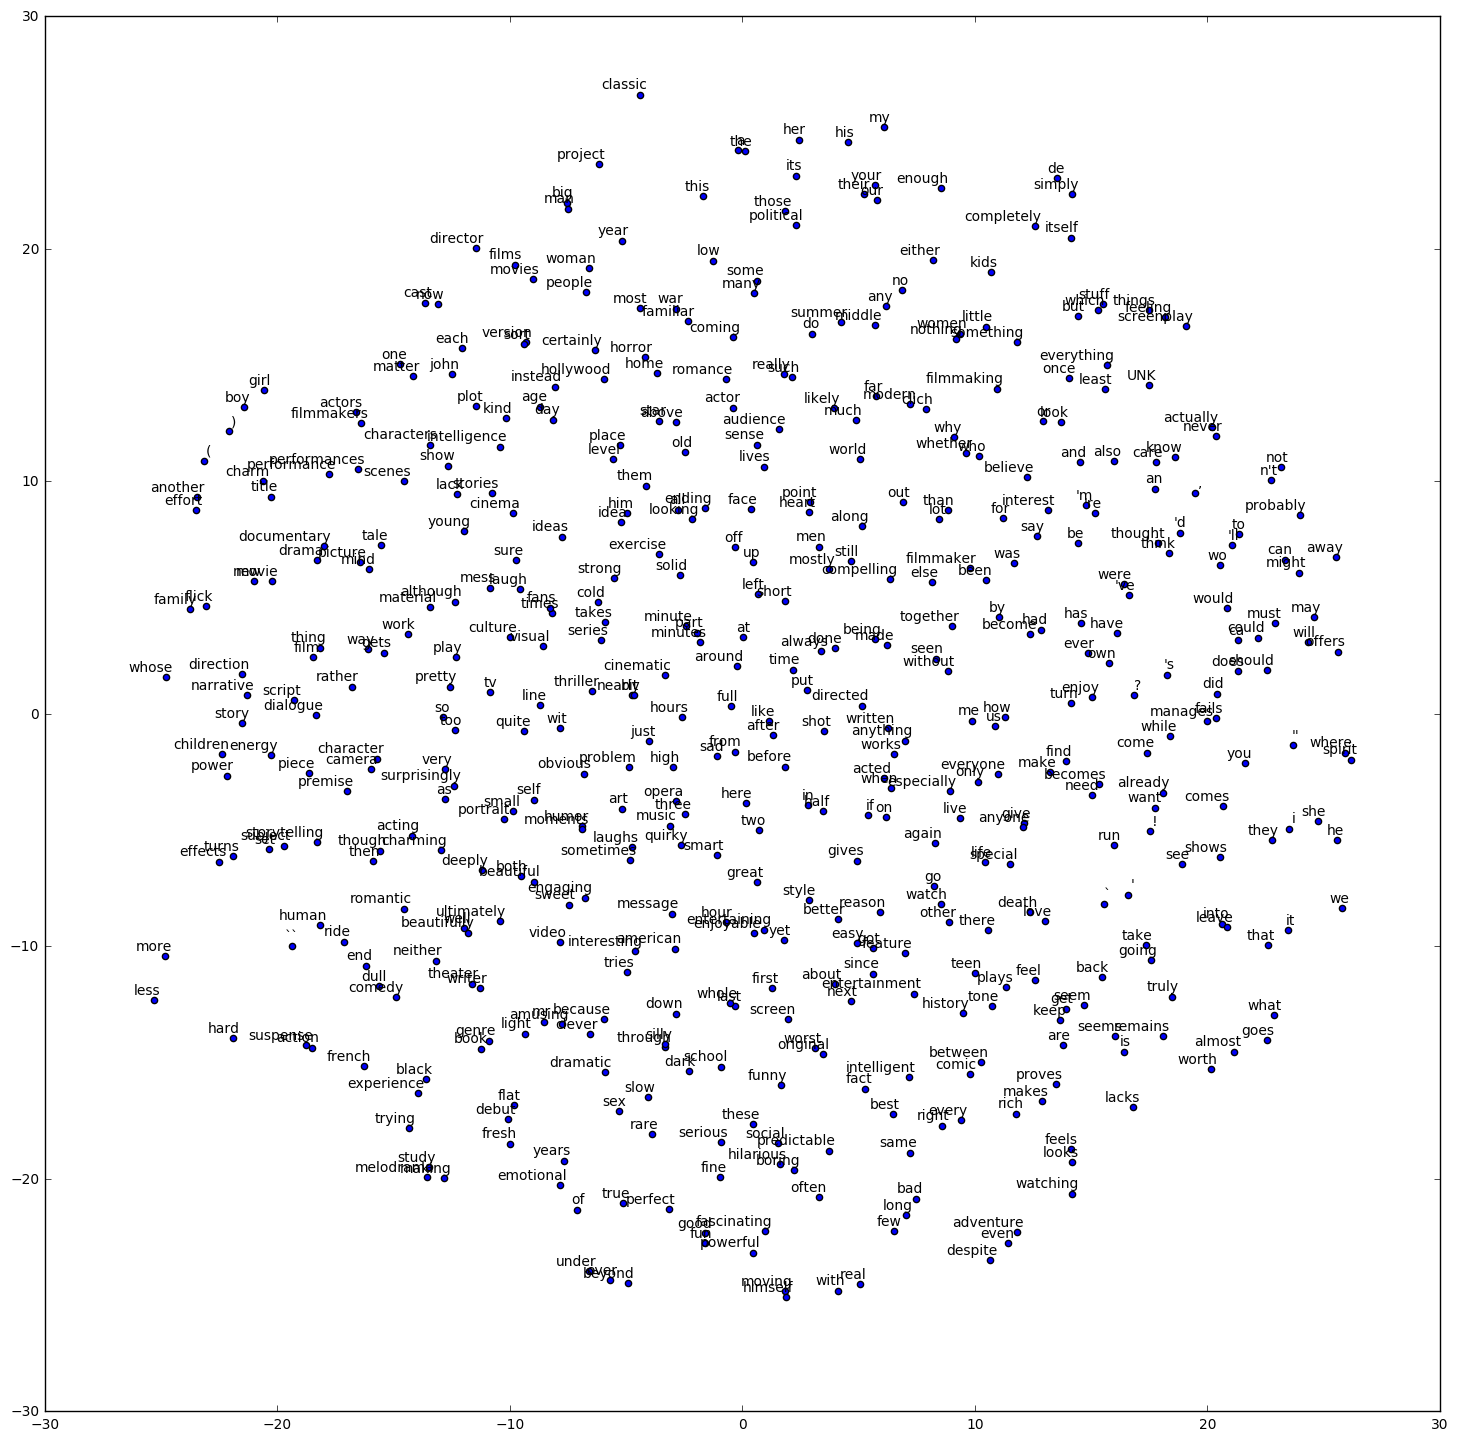

In [21]:
%matplotlib inline

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [trainer.word_from_id(i) for i in range(plot_only)]

plt.figure(figsize=(18, 18))  #in inches
for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

plt.show()

## Paragraph2vec

In [22]:
sentences.items()[:10]

[('11542', "It 's a masterpiece ."),
 ('11543', "It may not be `` Last Tango in Paris '' but ..."),
 ('11540',
  "One of the best , most understated performances of ( Jack Nicholson 's ) career ."),
 ('11541',
  "The Dangerous Lives of Altar Boys ' take on adolescence feels painfully true ."),
 ('11546', 'Charming and funny ( but ultimately silly ) movie .'),
 ('11547', "Third time 's the charm ... yeah , baby !"),
 ('11544',
  'They crush each other under cars , throw each other out windows , electrocute and dismember their victims in full consciousness .'),
 ('11545', "And we do n't avert our eyes for a moment ."),
 ('11548', 'A pleasant , if forgettable , romp of a film .'),
 ('11549',
  "By the end of the movie , you 're definitely convinced that these women are spectacular .")]

In [23]:
train[:10]

['1', '2', '61', '62', '63', '64', '68', '72', '82', '131']

In [24]:
import collections

VOCABULARY_SIZE = 50000

class DocumentCorpus(object):
    
    def __init__(self, documents, document_ids, vocabulary_size=VOCABULARY_SIZE):
        documents_words = {i: clean_text(documents[i]).split() for i in document_ids}
        
        _words = (w for words in documents_words.itervalues() for w in words)
        count = collections.Counter(_words).most_common(vocabulary_size - 1)
        
        dictionary = dict(UNK=0)
        for word, _ in count:
            dictionary[word] = len(dictionary)
        reverse_dictionary = {v: k for k, v in dictionary.iteritems()}
        
        self.dictionary = dictionary
        self.reverse_dictionary = reverse_dictionary
        
        data = list()
        document_index = dict()
        unk_count = 0
        for i, words in documents_words.iteritems():
            document_data = [self.word_to_id(w) for w in words]
            data.append(document_data)
            document_index[i] = len(data)
            unk_count += document_data.count(0)
        count.insert(0, ('UNK', unk_count))
        
        self.data = data
        self.document_index = document_index
        self.count = count
    
    @property
    def vocabulary_size(self):
        return len(self.dictionary)
    
    @property
    def documents_size(self):
        return len(self.data)
    
    def most_common(self, n=5):
        return self.count[:n]
    
    def word_to_id(self, word):
        return self.dictionary.get(word, 0)
    
    def word_from_id(self, i):
        return self.reverse_dictionary[i]

    def document_form_id(self, i):
        return self.data[self.document_index[i]]
    
    def document_form_id_words(self, i):
        return [self.word_from_id(j) for j in self.document_form_id(i)]

train_corpus = DocumentCorpus(sentences, train)

print('Vocabulary size:')
print(train_corpus.vocabulary_size)
print('\nDocuments size:')
print(train_corpus.documents_size)
print('\nMost common words (+UNK):')
print(train_corpus.most_common())
print('\nDocument example:')
print(train_corpus.document_form_id(train[0]))
print(train_corpus.document_form_id_words(train[0]))

Vocabulary size:
15338

Documents size:
8544

Most common words (+UNK):
[('UNK', 0), ('the', 7353), (',', 7131), ('a', 5313), ('and', 4521)]

Document example:
[1, 1094, 32, 179, 30, 8140, 36, 1030]
['the', 'results', 'are', 'far', 'more', 'alienating', 'than', 'involving']


In [25]:
import random
import numpy as np

class DocumentBatchGenerator(object):
    
    def __init__(self, documents, batch_size, num_skips, skip_window):
        assert batch_size % num_skips == 0
        assert num_skips <= 2 * skip_window

        self.documents = documents
        self.document_index = 0
        self.word_index = 0
        
        self.batch_size = batch_size
        self.num_skips = num_skips
        self.skip_window = skip_window
        
        self.window_size = 2 * skip_window + 1 # [ skip_window target skip_window ]

        self.window = collections.deque(maxlen=self.window_size)
        self.window_init()
        
    def window_init(self):
        for _ in range(self.window_size):
            self.window_next_word()
    
    def window_next_word(self):
        words = self.documents[self.document_index]
        self.window.append(words[self.word_index % len(words)])
        self.word_index += 1
        
    def window_forward(self):
        words = self.documents[self.document_index]
        if self.word_index >= len(words):
            self.document_index = (self.document_index + 1) % len(self.documents)
            self.word_index = 0
            self.window_init()
        else:
            self.window_next_word()
    
    def read(self):
        docs = np.ndarray(shape=(self.batch_size), dtype=np.int32)
        batch = np.ndarray(shape=(self.batch_size), dtype=np.int32)
        labels = np.ndarray(shape=(self.batch_size, 1), dtype=np.int32)
        
        for i in range(self.batch_size // self.num_skips):
            center = self.skip_window
            target = center
            targets_to_avoid = [ center ]
            for j in range(self.num_skips):
                while target in targets_to_avoid:
                    target = random.randint(0, self.window_size - 1)
                targets_to_avoid.append(target)
                docs[i * self.num_skips + j] = self.document_index
                batch[i * self.num_skips + j] = self.window[center]
                labels[i * self.num_skips + j, 0] = self.window[target]
            self.window_forward()

        return docs, batch, labels

data_reader = DocumentBatchGenerator(train_corpus.data, batch_size=10, num_skips=2, skip_window=1)

def print_batch():
    docs, batch, labels = data_reader.read()
    for i in range(len(batch)):
        print('{}: ({}, {}) -> ({}, {})'.format(docs[i],
                                          batch[i],
                                          train_data.word_from_id(batch[i]),
                                          labels[i, 0],
                                          train_data.word_from_id(labels[i, 0])))

print('1st Batch:\n')
print_batch()

print('\n2nd Batch:\n')
print_batch()

print('\n3rd Batch:\n')
print_batch()

1st Batch:

0: (8, 's) -> (3, a)
0: (8, 's) -> (9, it)
0: (3, a) -> (8, 's)
0: (3, a) -> (790, female)
1: (90, may) -> (25, not)
1: (90, may) -> (9, it)
1: (25, not) -> (90, may)
1: (25, not) -> (23, be)
1: (23, be) -> (25, not)
1: (23, be) -> (63, ``)

2nd Batch:

1: (63, ``) -> (263, point)
1: (63, ``) -> (23, be)
1: (263, point) -> (8427, switchblade)
1: (263, point) -> (63, ``)
1: (8427, switchblade) -> (11, in)
1: (8427, switchblade) -> (263, point)
1: (11, in) -> (7572, appetite)
1: (11, in) -> (8427, switchblade)
1: (7572, appetite) -> (11, in)
1: (7572, appetite) -> (62, '')

3rd Batch:

1: (62, '') -> (13, but)
1: (62, '') -> (7572, appetite)
2: (5, of) -> (26, one)
2: (5, of) -> (1, the)
2: (1, the) -> (5, of)
2: (1, the) -> (99, best)
2: (99, best) -> (1, the)
2: (99, best) -> (2, ,)
2: (2, ,) -> (99, best)
2: (2, ,) -> (57, most)


In [26]:
import math

class Doc2vecModel(object):
    
    #documents_size
    #vocabulary_size
    #embedding_size
    #num_sampled
    #valid_examples
    
    #input_docs
    #input_data
    #input_labels
    #loss
    #optimizer
    #normalized_embeddings
    #similarity
    
    def __init__(self,
                 documents_size,
                 vocabulary_size,
                 embedding_size,
                 num_sampled,
                 valid_examples):
        self.documents_size = documents_size
        self.vocabulary_size = vocabulary_size
        self.embedding_size = embedding_size
        self.num_sampled = num_sampled
        self.valid_examples = valid_examples
        
        self.build_graph()
    
    def build_graph(self):
        self.input_docs = tf.placeholder(tf.int32, shape=[None])
        self.input_data = tf.placeholder(tf.int32, shape=[None])
        self.input_labels = tf.placeholder(tf.int32, shape=[None, 1])
        
        docs_embeddings = tf.Variable(
            tf.random_uniform(
                [self.documents_size, self.embedding_size],
                -1.0,
                1.0))
        docs_lookup = tf.nn.embedding_lookup(docs_embeddings, self.input_docs)

        words_embeddings = tf.Variable(
            tf.random_uniform(
                [self.vocabulary_size, self.embedding_size],
                -1.0,
                1.0))
        words_lookup = tf.nn.embedding_lookup(words_embeddings, self.input_data)

        embed = tf.concat(1, [docs_lookup, words_lookup])
        
        nce_weights = tf.Variable(
            tf.truncated_normal(
                [self.vocabulary_size, 2 * self.embedding_size],
                stddev=1.0 / math.sqrt(2 * self.embedding_size)))
        nce_biases = tf.Variable(tf.zeros([self.vocabulary_size]))
    
        self.loss = tf.reduce_mean(
            tf.nn.nce_loss(
                weights=nce_weights,
                biases=nce_biases,
                labels=self.input_labels,
                inputs=embed,
                num_sampled=self.num_sampled,
                num_classes=self.vocabulary_size))

        self.optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(self.loss)

        norm = tf.sqrt(tf.reduce_sum(tf.square(words_embeddings), 1, keep_dims=True))
        self.normalized_embeddings = words_embeddings / norm
        
        valid_dataset = tf.constant(self.valid_examples, dtype=tf.int32)
        valid_embeddings = tf.nn.embedding_lookup(self.normalized_embeddings, valid_dataset)
        self.similarity = tf.matmul(valid_embeddings, self.normalized_embeddings, transpose_b=True)

class Doc2vecTrainer(object):
    
    #dataset
    #batch_size
    #num_skips
    #skip_window
    #embedding_size
    #num_sampled

    def __init__(self,
                 corpus,
                 batch_size,
                 num_skips,
                 skip_window,
                 embedding_size,
                 num_sampled):
        self.corpus = corpus
        self.batch_size = batch_size
        self.num_skips = num_skips
        self.skip_window = skip_window
        self.embedding_size = embedding_size
        self.num_sampled = num_sampled
    
    def word_from_id(self, i):
        return self.corpus.word_from_id(i)

    def train(self, num_steps=100001):
        data_reader = self.data_reader()
        valid_examples = self.valid_examples()
        top_k = 8 # number of nearest neighbors
        
        with tf.Graph().as_default(), tf.Session() as session:
            model = self.build_model(valid_examples)
            
            init = tf.initialize_all_variables()
            session.run(init)
            print('Initialized.\n')
            
            train_ops = [model.optimizer, model.loss]
            average_loss = 0
            
            for step in range(num_steps):
                batch_docs, batch_data, batch_labels = data_reader.read()
                feed_dict = {
                    model.input_docs: batch_docs,
                    model.input_data: batch_data,
                    model.input_labels: batch_labels,
                }
                
                _, loss_val = session.run(train_ops, feed_dict=feed_dict)
                average_loss += loss_val
                
                if step % 2000 == 0:
                    if step > 0:
                        average_loss /= 2000
                    print('Average loss at step {}: {}'.format(step, average_loss))
                    average_loss = 0
                
                if step % 10000 == 0:
                    similarity = session.run(model.similarity)
                    print()
                    for i, example_id in enumerate(valid_examples):
                        valid_word = self.word_from_id(example_id)
                        nearest = (-similarity[i, :]).argsort()[1:top_k+1]
                        nearest_words = ', '.join(self.word_from_id(k) for k in nearest)
                        print('Nearest to {}: {}'.format(valid_word, nearest_words))
                    print()
            
            final_embeddings = session.run(model.normalized_embeddings)
        
        return final_embeddings
    
    def data_reader(self):
        return DocumentBatchGenerator(self.corpus.data,
                                      self.batch_size,
                                      self.num_skips,
                                      self.skip_window)

    def valid_examples(self, sample_size=16):
        return np.random.choice(self.corpus.vocabulary_size - 1,
                                sample_size,
                                replace=False)

    def build_model(self, valid_examples):
        return Doc2vecModel(self.corpus.documents_size,
                            self.corpus.vocabulary_size,
                            self.embedding_size,
                            self.num_sampled,
                            valid_examples)

In [27]:
%%time

doc_trainer = Doc2vecTrainer(
    train_corpus,
    batch_size = 128,
    skip_window = 1,       # How many words to consider left and right.
    num_skips = 2,         # How many times to reuse an input to generate a label.
    embedding_size = 128,  # Dimension of the embedding vector.
    num_sampled = 64)      # Number of negative examples to sample.

word_embeddings = doc_trainer.train()

Initialized.

Average loss at step 0: 254.006271362

Nearest to craftsmanship: pure, versatile, luther, cronenberg, how, frighten, vaunted, edge
Nearest to believing: dodge, shoot, equals, russell, conquers, ka, campion, sources
Nearest to passive: authenticity, interplay, roads, considerably, c, picked, ignoring, 19
Nearest to intolerant: crude, israeli, campanella, agent, molto, generating, polished, ai
Nearest to pounding: laddish, collapse, frightening, unentertaining, stardom, temple, brew, 'm
Nearest to moviemaking: hip, reactionary, crawls, upsets, postcard, rendered, overwhelms, raymond
Nearest to acceptable: sequel, mikes, deadening, charitable, gauge, digital, patriarchal, virulent
Nearest to discursive: perennial, jones, group, imamura, lucia, lower, steaming, pointing
Nearest to still: statham, bop, unguarded, lisa, comfort, update, andie, frantic
Nearest to achieved: sultry, promising, uncool, uncertainty, ingest, promoter, midsection, tapestry
Nearest to terri: insanely, 

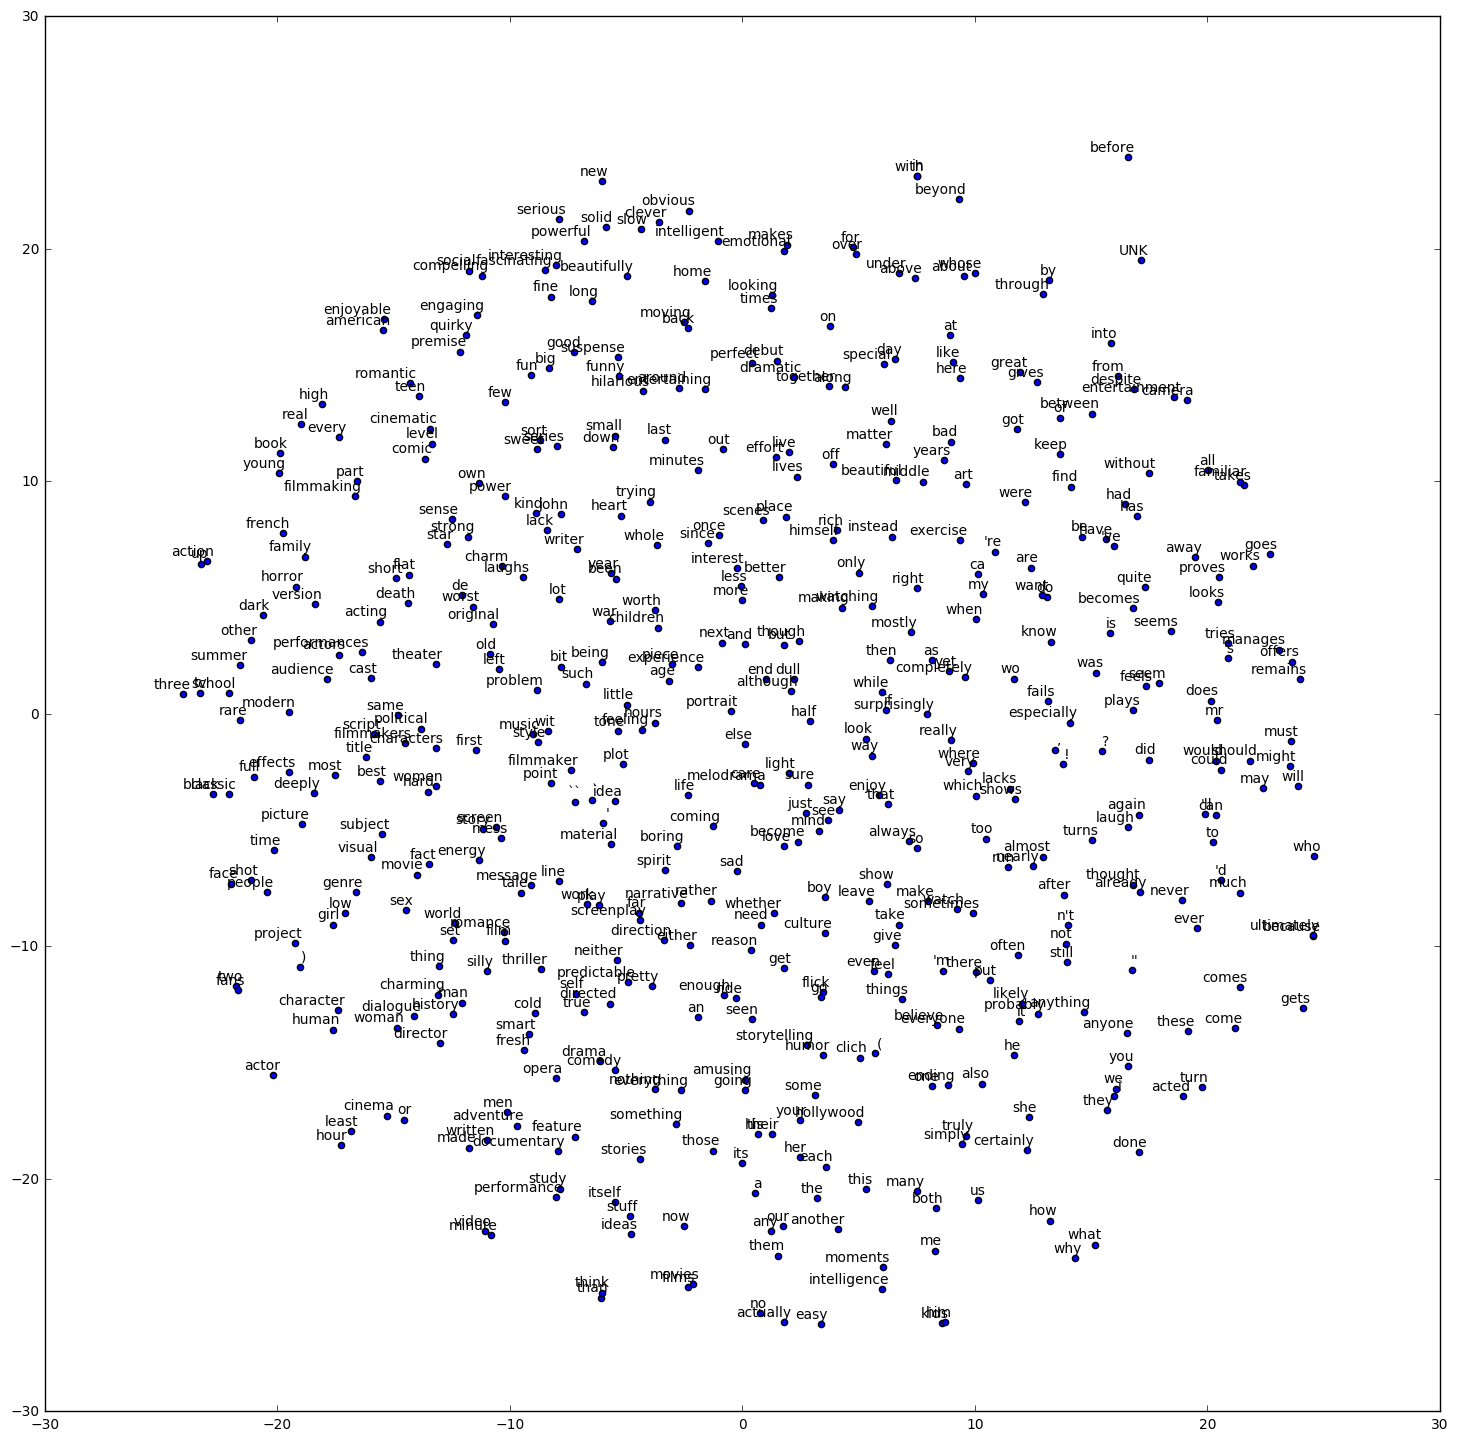

In [28]:
%matplotlib inline

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(word_embeddings[:plot_only,:])
labels = [doc_trainer.word_from_id(i) for i in range(plot_only)]

plt.figure(figsize=(18, 18))  #in inches
for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

plt.show()